In [1]:
#https://www.bloomberg.com/notices/financial-data/
#https://www.bloomberg.com/markets/currencies/cross-rates
#http://www.cs.columbia.edu/~sedwards/classes/2016/4840-spring/designs/FOREX.pdf
#https://priceonomics.com/jobs/puzzle/

from math import log

def arbitrage(graph):
    transformed_graph = [[-log(edge) for edge in row] for row in graph]

    # Pick any source vertex -- we can run Bellman-Ford from any vertex and
    # get the right result
    source = 0
    n = len(transformed_graph)
    min_dist = [float('inf')] * n

    min_dist[source] = 0

    # Relax edges |V - 1| times
    for i in range(n - 1):
        for v in range(n):
            for w in range(n):
                if min_dist[w] > min_dist[v] + transformed_graph[v][w]:
                    min_dist[w] = min_dist[v] + transformed_graph[v][w]

    # If we can still relax edges, then we have a negative cycle
    for v in range(n):
        for w in range(n):
            if min_dist[w] > min_dist[v] + transformed_graph[v][w]:
                return min_dist, True

    return min_dist,False

In [2]:
import numpy
table = numpy.loadtxt(open("exchange_matrix.csv", "rb"), delimiter=",", skiprows=0)
transformed_graph = [[-log(edge) for edge in row] for row in table]

In [3]:
min_dist, B = arbitrage(table)

In [4]:
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) 
      for row in table]))

 1.01.14560.00911.30791.00440.76320.7250.1274
0.8729 1.00.0081.14170.87680.66620.63290.1112
109.5125.4432 1.0143.2151109.983983.57579.387513.9546
0.76460.87590.007 1.00.7680.58360.55430.0974
0.99561.14060.00911.3021 1.00.75990.72180.1269
1.31021.5010.0121.71361.316 1.00.94990.167
1.37931.58010.01261.8041.38541.0528 1.00.1758
7.84698.98940.071710.2637.88165.98915.689 1.0


In [6]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


max_weight = table.max()
G = nx.DiGraph(table)
pos = nx.layout.circular_layout(G)

node_sizes = [100 for i in range(len(G))]
M = G.number_of_edges()

edge_colors = [500*(-np.log(d['weight']/max_weight)) for (u, v, d) in G.edges(data=True)]


weights = [(-np.log(d['weight']/max_weight))/3 for (u, v, d) in G.edges(data=True)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='white')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors, width=weights)

labels={}
labels[0]= 'USD'
labels[1]= 'EUR'
labels[2]= 'JPY'
labels[3]= 'GBP'
labels[4]= 'CHF'
labels[5]= 'CAD'
labels[6]= 'AUD'
labels[7]= 'HKD'
nx.draw_networkx_labels(G,pos,labels,font_size=10)    


ax = plt.gca()
ax.set_axis_off()
plt.show()

<Figure size 640x480 with 1 Axes>

In [7]:
pairs = np.zeros([8,8])
count = 1 
for i in range(8):
    for j in range(8):
        pairs[i][j] = table[j][i]*table[i][j]
        print(labels[i] + '/'  + labels[j])
        print(table[j][i]*table[i][j])
        print("\n")
    

USD/USD
1.0


USD/EUR
0.9999942399999999


USD/JPY
0.9964500000000001


USD/GBP
1.00002034


USD/CHF
0.99998064


USD/CAD
0.99994464


USD/AUD
0.9999925


USD/HKD
0.9996950600000001


EUR/USD
0.9999942399999999


EUR/EUR
1.0


EUR/JPY
1.0035456


EUR/GBP
1.00001503


EUR/CHF
1.00007808


EUR/CAD
0.9999661999999999


EUR/AUD
1.00004529


EUR/HKD
0.99962128


JPY/USD
0.9964500000000001


JPY/EUR
1.0035456


JPY/JPY
1.0


JPY/GBP
1.0025057000000002


JPY/CHF
1.0008534900000001


JPY/CAD
1.0029000000000001


JPY/AUD
1.0002825


JPY/HKD
1.00054482


GBP/USD
1.00002034


GBP/EUR
1.00001503


GBP/JPY
1.0025057000000002


GBP/GBP
1.0


GBP/CHF
1.0000128000000001


GBP/CAD
1.00005696


GBP/AUD
0.9999572000000001


GBP/HKD
0.9996162


CHF/USD
0.99998064


CHF/EUR
1.00007808


CHF/JPY
1.0008534900000001


CHF/GBP
1.0000128000000001


CHF/CHF
1.0


CHF/CAD
1.0000284000000002


CHF/AUD
0.99998172


CHF/HKD
1.00017504


CAD/USD
0.99994464


CAD/EUR
0.9999661999999999


CAD/JPY
1.0029000000000001


C

In [8]:
#USD based triplets 
triplets = np.zeros([8,8])
count = 1
for i in range(8):
    for j in range(8):
        triplets[i][j] = table[i][0]*table[j][i]*table[0][j]
        count = count + 1
        print(labels[0] + '/' + labels[i] + '/'  + labels[j])
        print(table[i][0]*table[j][i]*table[0][j])
        print("\n")

USD/USD/USD
1.0


USD/USD/EUR
0.9999942399999999


USD/USD/JPY
0.9964500000000001


USD/USD/GBP
1.00002034


USD/USD/CHF
0.99998064


USD/USD/CAD
0.99994464


USD/USD/AUD
0.9999925


USD/USD/HKD
0.9996950600000001


USD/EUR/USD
0.9999942399999999


USD/EUR/EUR
0.9999942399999999


USD/EUR/JPY
0.9964442604480002


USD/EUR/GBP
0.9999851705690002


USD/EUR/CHF
1.000010510856


USD/EUR/CAD
0.9999621172799998


USD/EUR/AUD
0.9999702352500001


USD/EUR/HKD
0.999688340924


USD/JPY/USD
0.9964500000000001


USD/JPY/EUR
1.0035456


USD/JPY/JPY
0.9964500000000001


USD/JPY/GBP
1.00250535


USD/JPY/CHF
1.00083438


USD/JPY/CAD
1.0028448


USD/JPY/AUD
1.0002825


USD/JPY/HKD
1.0002365100000001


USD/GBP/USD
1.00002034


USD/GBP/EUR
1.000044440192


USD/GBP/JPY
0.996470615686


USD/GBP/GBP
1.00002034


USD/GBP/CHF
0.9999662369039999


USD/GBP/CAD
0.9999588049919999


USD/GBP/AUD
1.0000203399999998


USD/GBP/HKD
0.9997192405199999


USD/CHF/USD
0.99998064


USD/CHF/EUR
1.000042446848


USD/CHF/JPY
0

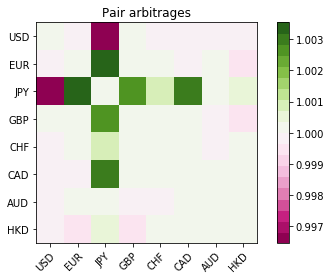

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

vegetables = ['USD','EUR','JPY','GBP','CHF','CAD','AUD','HKD']
farmers = ['USD','EUR','JPY','GBP','CHF','CAD','AUD','HKD']

harvest = np.array(pairs)


fig, ax = plt.subplots()
im = ax.imshow(harvest,cmap=plt.get_cmap("PiYG", 20))
cbar = fig.colorbar(im)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


ax.set_title("Pair arbitrages")
fig.tight_layout()
plt.show()

In [10]:
pairs.max()

1.0035456

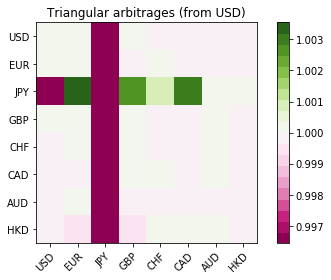

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

vegetables = ['USD','EUR','JPY','GBP','CHF','CAD','AUD','HKD']
farmers = ['USD','EUR','JPY','GBP','CHF','CAD','AUD','HKD']

harvest = np.array(triplets)


fig, ax = plt.subplots()
im = ax.imshow(harvest,cmap=plt.get_cmap("PiYG", 20))
cbar = fig.colorbar(im)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


ax.set_title("Triangular arbitrages (from USD)")
fig.tight_layout()
plt.show()

In [12]:
triplets.max()

1.0035456

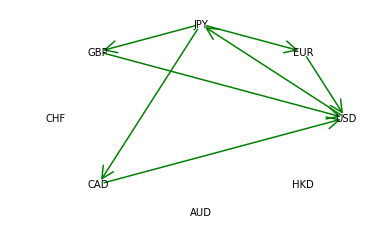

In [13]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


max_weight = table.max()
G = nx.DiGraph(table)
pos = nx.layout.circular_layout(G)

node_sizes = [100 for i in range(len(G))]
M = G.number_of_edges()

enontriplets = [(u, v) for (u, v, d) in G.edges(data=True) if triplets[u][v] <1.002 ] 

G.remove_edges_from(enontriplets)

etous = [(0, u) for (u, v, d) in G.edges(data=True)] 

efromus = [(v, 0) for (u, v, d) in G.edges(data=True)]

G.add_edges_from(etous)
G.add_edges_from(efromus)


edge_colors = [ 'green'   for (u, v, d) in G.edges(data=True) ]


nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='white')

edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=30, edge_color=edge_colors,width=1.5)


labels={}
labels[0]= 'USD'
labels[1]= 'EUR'
labels[2]= 'JPY'
labels[3]= 'GBP'
labels[4]= 'CHF'
labels[5]= 'CAD'
labels[6]= 'AUD'
labels[7]= 'HKD'
nx.draw_networkx_labels(G,pos,labels,font_size=10)    

ax = plt.gca()
ax.set_axis_off()
plt.show()